In [1]:
import os
os.chdir('../..')

In [8]:
from classes.matching import Matching

import numpy as np
import json
import pandas as pd
from datetime import datetime
import time
import ast

from classes.helpers import *

import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import matplotlib
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True

# For the Python notebook
%matplotlib inline
%reload_ext autoreload
%autoreload 2

colors = {'ba': (232/255,164/255,29/255), 'rb': (0/255,152/255,205/255)}
labels = {'ba': 'BeerAdvocate', 'rb': 'RateBeer'}

notext = {'ba': 'nan', 'rb': ''}

data_folder = '../data/'
save_folder = '../figures/all/4-herding/'

min_nbr_rats = 5

# Load DF

In [9]:
df = pd.read_csv(data_folder + 'tmp/time_series_{}_ranks.csv'.format(min_nbr_rats), header=[0,1])

# Transform strings into arrays
for i in df.index:
    for key1 in ['ba', 'rb']:
        for key2 in ['dates', 'ratings', 'z_scores', 'ranks']:
            arr = ast.literal_eval(df.loc[i][key1][key2])
            df.set_value(i, (key1, key2), arr)

In [10]:
df

ba                       \
      avg_ratings avg_z_scores beer_id   
0        3.439867    -0.649167   19827   
1        3.888750     0.093110   20841   
2        3.556094    -0.478579   20842   
3        3.578000    -0.680129  126800   
4        4.354000     0.769989  137190   
5        3.931667    -0.032174  137238   
6        3.563333    -0.885428  178834   
7        3.808000    -0.302920  116444   
8        3.735000    -0.309457  116445   
9        3.893333    -0.138840  114436   
10       3.691509    -0.309280   69626   
11       3.627174    -0.396437   79652   
12       3.791000    -0.174156   93771   
13       3.898889    -0.063086   95877   
14       3.620000    -0.488191   95926   
15       3.701622    -0.376810  106945   
16       3.984444     0.039266  156100   
17       4.006429     0.037799  222422   
18       3.853947    -0.215702   87965   
19       3.858333    -0.273985  244258   
20       3.593704    -0.651958   87972   
21       4.000714     0.124946   87452   
22       3.990000     0.020510  244257   
23       3.815556    -0.318721  116871   
24       4.103750     0.238621  257295   
25       3.820000    -0.198995  100048   
26       3.218000    -1.018528   46892   
27       3.649091    -0.495733   53737   
28       3.853750    -0.138881   70087   
29       3.371304    -0.924914   72039   
...           ...          ...     ...   
12860    3.170000    -1.087386   13049   
12861    2.881111    -1.745699   90429   
12862    3.278409    -1.015126   85748   
12863    3.546471    -0.647835  127049   
12864    3.208333    -1.038557   24203   
12865    3.381250    -0.748765   25341   
12866    3.751034    -0.084808   23227   
12867    3.302381    -0.864064   74419   
12868    3.732000    -0.252210    1609   
12869    4.082500     0.307072     238   
12870    4.113333     0.411308     239   
12871    4.104286     0.486951    5832   
12872    3.535455    -0.467224    8255   
12873    3.610769    -0.324915   43569   
12874    3.871250     0.139371   45396   
12875    3.810833     0.032439   43568   
12876    3.116667    -1.201653   46266   
12877    3.807143    -0.098035   86988   
12878    3.500000    -0.693008  117588   
12879    3.925833     0.082448   97957   
12880    3.344667    -0.932540   88236   
12881    4.069600     0.331951   90364   
12882    3.450000    -0.763013  107818   
12883    4.012353     0.224478   93947   
12884    4.430625     0.971147   98058   
12885    3.114167    -1.398643   99539   
12886    3.260000    -0.940805   37457   
12887    3.545000    -0.488225   47287   
12888    3.664762    -0.229246   37177   
12889    3.577632    -0.398687   36418   

                                                          \
                                                   dates   
0      [1094983200, 1100775600, 1151920800, 117231480...   
1      [1113732000, 1142247600, 1269514800, 127020240...   
2      [1111143600, 1174388400, 1263812400, 126726840...   
3      [1403863200, 1405850400, 1421838000, 144905400...   
4      [1410688800, 1418382000, 1432720800, 144239760...   
5      [1410688800, 1425639600, 1426244400, 147255120...   
6      [1435140000, 1439028000, 1453114800, 146088720...   
7      [1419505200, 1445335200, 1449226800, 145078200...   
8      [1398074400, 1408356000, 1418727600, 141933240...   
9      [1393671600, 1431943200, 1433412000, 144429840...   
10     [1306922400, 1316080800, 1316080800, 131616720...   
11     [1332500400, 1332842400, 1333101600, 133327440...   
12     [1368784800, 1373018400, 1386068400, 139125240...   
13     [1372500000, 1392807600, 1393412400, 142209720...   
14     [1372586400, 1387882800, 1388228400, 139738320...   
15     [1385809200, 1385982000, 1387882800, 139073400...   
16     [1422702000, 1430042400, 1430042400, 143047440...   
17     [1459677600, 1459677600, 1460714400, 146071440...   
18     [1355310000, 1367748000, 1368784800, 140014800...   
19     [1470823200, 1476525600, 1481886000, 148240440...   
20     [1355310000, 1367748000, 1371981600, 1379

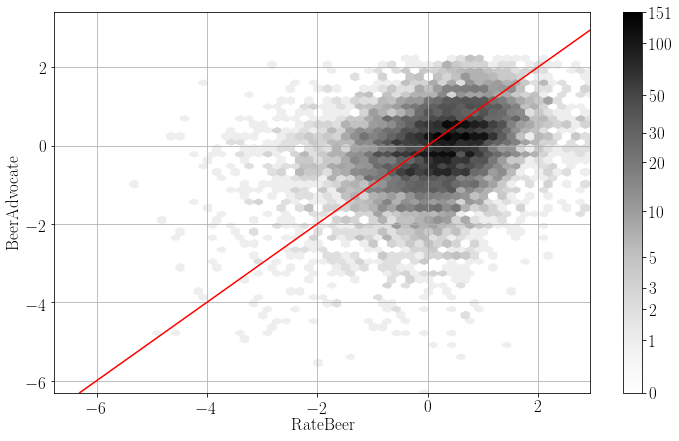

In [17]:
ticks = [0, 1, 2, 3, 5, 10, 20, 30, 50, 100, 151]
log_ticks = []
for t in ticks:
    log_ticks.append(np.log10(t+1))

plt.figure(figsize=(12,7))
plt.rc('font', family='serif')
plt.rc('font', size=17)

ax = plt.subplot(111)

rb = [zscore[0] for zscore in df['rb']['z_scores']]
ba = [zscore[0] for zscore in df['ba']['z_scores']]

hb = ax.hexbin(rb, ba, gridsize=50, bins='log', cmap='Greys')
ax.plot([min(np.min(rb), np.min(ba)), max(np.max(rb), np.max(ba))], 
        [min(np.min(rb), np.min(ba)), max(np.max(rb), np.max(ba))], 'red')

#ax.axis([0, 5, 0, 5])

cb = plt.colorbar(hb, ax=ax, ticks=log_ticks)
cb.ax.set_yticklabels(ticks)
ax.set_facecolor('white')

plt.xlabel('RateBeer')
plt.ylabel('BeerAdvocate')

plt.grid()

In [35]:
def dist(x, y):
    return np.abs(-x+y)/np.sqrt(2)

In [36]:
dist = [dist(x, y) for (x, y) in zip(rb, ba)]

In [37]:
idx = np.argsort(dist)[::-1]

In [38]:
idx[0]

3306

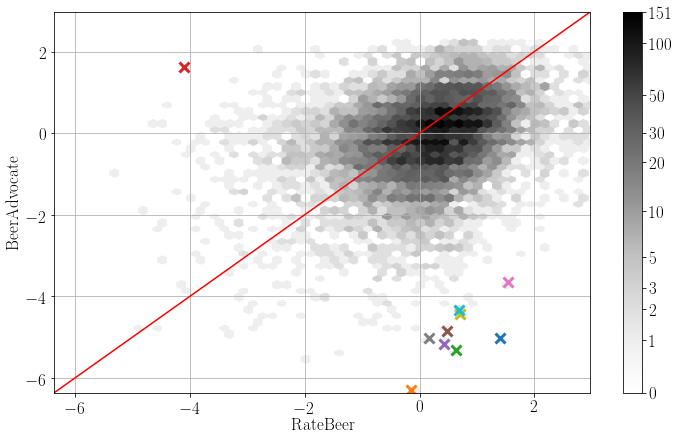

In [44]:
ticks = [0, 1, 2, 3, 5, 10, 20, 30, 50, 100, 151]
log_ticks = []
for t in ticks:
    log_ticks.append(np.log10(t+1))

plt.figure(figsize=(12,7))
plt.rc('font', family='serif')
plt.rc('font', size=17)

ax = plt.subplot(111)

rb = [zscore[0] for zscore in df['rb']['z_scores']]
ba = [zscore[0] for zscore in df['ba']['z_scores']]

hb = ax.hexbin(rb, ba, gridsize=50, bins='log', cmap='Greys')
ax.plot([min(np.min(rb), np.min(ba))*1.01, max(np.max(rb), np.max(ba))*1.01], 
        [min(np.min(rb), np.min(ba))*1.01, max(np.max(rb), np.max(ba))*1.01], 'red')

ax.axis([min(np.min(rb), np.min(ba))*1.01, max(np.max(rb), np.max(ba))*1.01, 
         min(np.min(rb), np.min(ba))*1.01, max(np.max(rb), np.max(ba))*1.01])

cb = plt.colorbar(hb, ax=ax, ticks=log_ticks)
cb.ax.set_yticklabels(ticks)
ax.set_facecolor('white')

plt.xlabel('RateBeer')
plt.ylabel('BeerAdvocate')

plt.grid()

for i in range(10):
    plt.plot([rb[idx[i]]], [ba[idx[i]]], 'x', mew=3, ms=10)
plt.savefig(save_folder + 'hexhist_fringe_first.pdf', bbox_inches='tight')

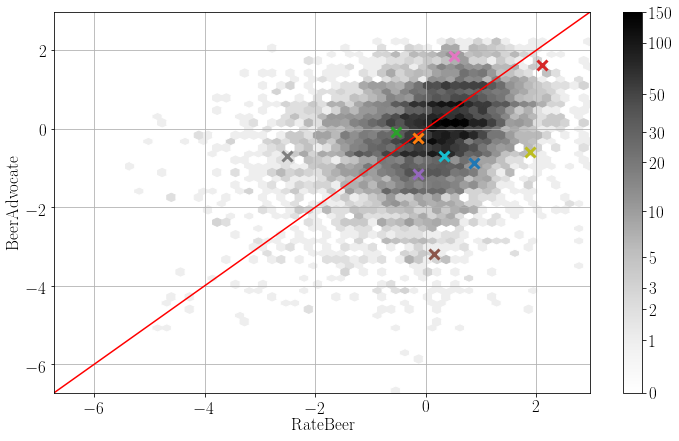

In [45]:
ticks = [0, 1, 2, 3, 5, 10, 20, 30, 50, 100, 150]
log_ticks = []
for t in ticks:
    log_ticks.append(np.log10(t+1))

plt.figure(figsize=(12,7))
plt.rc('font', family='serif')
plt.rc('font', size=17)

ax = plt.subplot(111)

rb = [zscore[1] for zscore in df['rb']['z_scores']]
ba = [zscore[1] for zscore in df['ba']['z_scores']]

hb = ax.hexbin(rb, ba, gridsize=50, bins='log', cmap='Greys')
ax.plot([min(np.min(rb), np.min(ba))*1.01, max(np.max(rb), np.max(ba))*1.01], 
        [min(np.min(rb), np.min(ba))*1.01, max(np.max(rb), np.max(ba))*1.01], 'red')

ax.axis([min(np.min(rb), np.min(ba))*1.01, max(np.max(rb), np.max(ba))*1.01, 
         min(np.min(rb), np.min(ba))*1.01, max(np.max(rb), np.max(ba))*1.01])

cb = plt.colorbar(hb, ax=ax, ticks=log_ticks)
cb.ax.set_yticklabels(ticks)
ax.set_facecolor('white')

plt.xlabel('RateBeer')
plt.ylabel('BeerAdvocate')

plt.grid()

for i in range(10):
    plt.plot([rb[idx[i]]], [ba[idx[i]]], 'x', mew=3, ms=10)

plt.savefig(save_folder + 'hexhist_fringe_second.pdf', bbox_inches='tight')